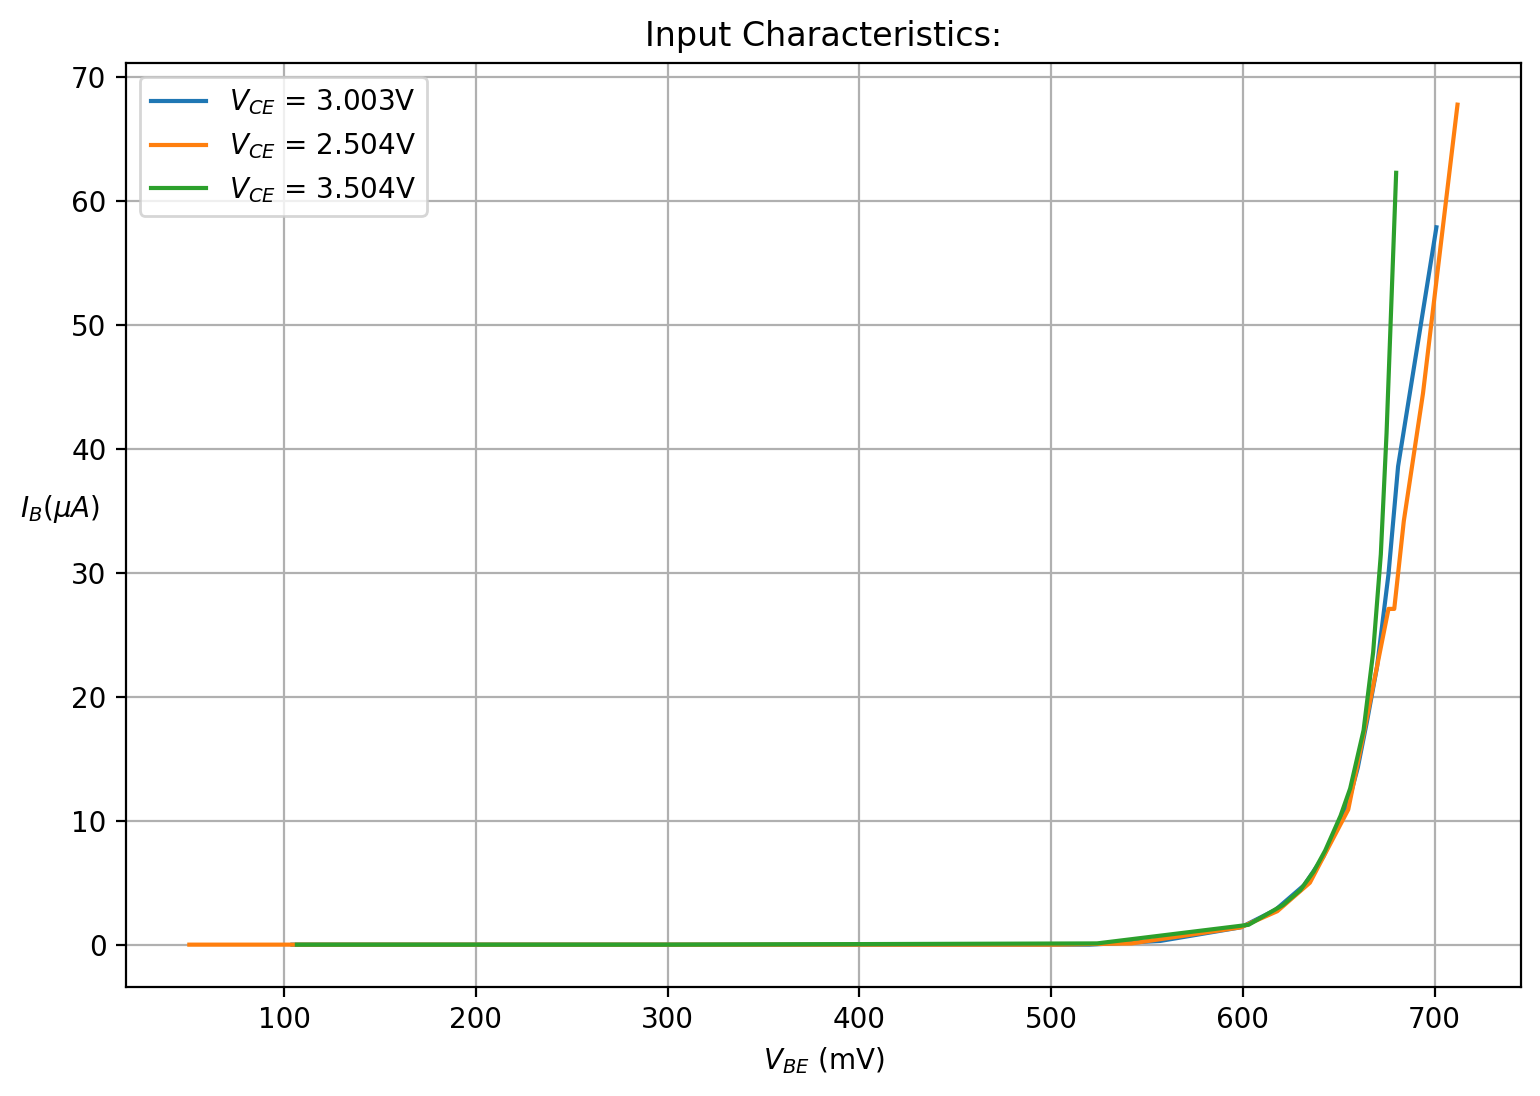

I/V(microA/milliV) = 0.001152714535901897
Input impedance = 867.5174718930638


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('input.csv')

input_cols = {('V_BE(2.504)','I_B(2.504)'), ('V_BE(3.003)','I_B(3.003)'),('V_BE(3.504)','I_B(3.504)')}
plt.figure(figsize=(9,6), dpi=200)
plt.grid()
plt.xlabel(r'$V_{BE}$ (mV)')
plt.ylabel(r'$I_B (\mu A)$', rotation=0)
plt.title('Input Characteristics:')
for k, v in input_cols:
    input = np.vstack((
                    np.where(
                            np.isfinite(df[k]), 
                            df[k], 0
                            ), 
                    np.where(
                        np.isfinite(df[v]), df[v], 0
                            )
                    ))
    plt.plot(input[0], input[1], label=r'$V_{CE}$ = ' + k[5:10] + 'V')
    
plt.legend()
a,b = np.polyfit(input[0][9:13] * 10**(-3), input[1][9:13] * 10**(-6), 1)
plt.show()

print(f"I/V(microA/milliV) = {a}")
print(f"Input impedance = {1/a} ohms")


